<a href="https://colab.research.google.com/github/Fritz-Rodrigo/Numerical_Analysis/blob/main/2021-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1

Sea $I$ un intervalo cerrado y acotado de $\mathbb{R}$, y sea $f: I \to I$ una función continua.
Pruebe que $f$ tiene un punto fijo en $I$.

Sean $a,b$ los extremos del intervalo $I$. Como $f(x) \in [a,b]$ entonces $f(a) \geq a$ y $f(b) \leq b$. Sea $g(x) = f(x) - x$, entonces $g(a) \geq 0$ y $g(b) \leq 0$, y como $f$ es continua entonces $g$ es continua y existe por lo menos un $\xi \in [a,b]$ tal que $g(\xi) = 0$, i.e. $f(\xi) = \xi$ para algún $\xi \in [a,b]$, por lo tanto $\xi$ es punto fijo.

# 2

Encuentre el spline cúbico $s \in C^2[0,2]$ en la partición ${0,1,2}$ del intervalo $[0,2]$ tal que:

$$s(0) = 2,\ s(1) = 1,\ s(2) = 4$$

$$s'(0) = 1,\ s'(2) = 13$$

### Spline Cúbico Modificado

Para 3 puntos tenemos 2 intervalos: $[t_1,t_2]$ y $[t_2,t_3]$, así que el interpolante requerido es una función cúbica a trozos definida por 2 polinomios cúbicos. Sea

$$p_\alpha(t) = \alpha_1 + \alpha_2 t + \alpha_3 t^2 + \alpha_4 t^3$$
el polinomio del primer intervalo, y
$$p_\beta(t) = \beta_1 + \beta_2 t + \beta_3 t^2 + \beta_4 t^3$$

el del segundo intervalo. Como queremos que $s$ pase por los puntos (0,2), (1,1) y (2,4) y que $s'(0)=1$ y $s'(2)=13$, sacrificamos las condiciones del spline cúbico natural de que la segunda derivada en los extremos sea cero por estas condiciones, y el sistema de ecuaciones a resolver es el siguiente

$$Ax = 
\begin{pmatrix}
    1 & t_1 & t_1^2 & t_1^3 & 0 & 0 & 0 & 0 \\
    1 & t_2 & t_2^2 & t_2^3 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & t_2 & t_2^2 & t_2^3 \\
    0 & 0 & 0 & 0 & 1 & t_3 & t_3^2 & t_3^3 \\
    0 & 1 & 2t_2 & 3t_2^2 & 0 & -1 & -2t_2 & -3t_2^2 \\
    0 & 0 & 2 & 6t_2 & 0 & 0 & -2 & -6t_2 \\
    0 & 1 & 2t_1 & 3t_1^2 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & 2t_3 & 3t_3^2 \\
\end{pmatrix}
\begin{pmatrix}
    \alpha_1 \\
    \alpha_2 \\
    \alpha_3 \\
    \alpha_4 \\
    \beta_1 \\
    \beta_2 \\
    \beta_3 \\
    \beta_4 \\
\end{pmatrix}
=
\begin{pmatrix}
    2 \\
    1 \\
    1 \\
    4 \\
    0 \\
    0 \\
    1 \\
    13 \\
\end{pmatrix}
= y$$

Las primeras 2 ecuaciones son el polinomio $p_\alpha(t)$ evaluado en los extremos $t_1$ y $t_2$ del primer intervalo y las 2 ecuaciones siguientes son el polinomio $p_\beta(t)$ evaluado en los extremos $t_2$ y $t_3$ del segundo intervalo. Las ecuaciones 2 y 3 deben cumplir que $p_\alpha(t_2) = p_\beta(t_2)$. Las ecuaciones 5 y 6 cumplen la condición de continuidad en la primera derivada en $t_2$, y en la segunda derivada, respectivamente. Finalmente, las ecuaciones 7 y 8 cumplen $s'(t_1) = 1$ y $s'(t_3) = 13$.

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [ ]:
def pol(t,c):
    p = 0
    for i in range(len(c)): #Solo funciona con len(c) y no con len(t), no sé por qué
        p = p + c[i]*(t)**i
    return p

def cubic_spline_mod(t,s):
    
    n = len(t)
    A = np.zeros([8,8])

    for i in range(n-2): #Aquí estoy tomando todos los puntos y al final escojo los que quiero graficar

        for j in range(4):
            A[0,j] = t[i]**j
            A[1,j] = t[i+1]**j
            A[2,4+j] = t[i+1]**j
            A[3,4+j] = t[i+2]**j
        for j in range(3):
            A[4,j+1] = (j+1)*t[i+1]**(j)
            A[4,j+5] = -(j+1)*t[i+1]**(j)
        A[5,2] = 2
        A[5,3] = 6*t[i+1]
        A[5,6] = -2
        A[5,7] = -6*t[i+1]
#         A[6,2] = 2
#         A[6,3] = 6*t[i]
#         A[7,6] = 2
#         A[7,7] = 6*t[i+2]
        for j in range(3):
            A[6,j+1] = (j+1)*t[i]**(j)
            A[7,j+5] = (j+1)*t[i+2]**(j)
        print(A)

        y = np.zeros(8)
        y[0] = s[i]
        y[1] = s[i+1]
        y[2] = s[i+1]
        y[3] = s[i+2]
        y[6] = 1
        y[7] = 13

        c = la.solve(A,y)
        α = c[0:4]
        β = c[4:8]
        x1 = np.linspace(t[i],t[i+1],51)
        x2 = np.linspace(t[i+1],t[i+2],51)
        plt.plot(x1, pol(x1,α))
        plt.plot(x2, pol(x2,β))
        
    plt.plot(t, s, 'ko')
    
    return α,β

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  2.  4.  8.]
 [ 0.  1.  2.  3.  0. -1. -2. -3.]
 [ 0.  0.  2.  6.  0.  0. -2. -6.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  4. 12.]]


(array([ 2.,  1., -3.,  1.]), array([ -2.,  13., -15.,   5.]))

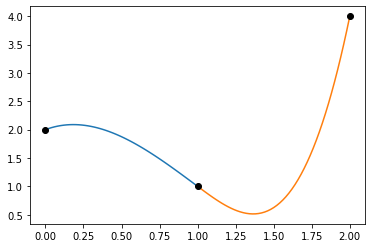

In [ ]:
cubic_spline_mod([0,1,2], [2,1,4])

# 4

$$h = 2, \qquad w_0 = \frac{3}{2}, \qquad w_1 = \frac{1}{2}, \qquad w_2 = \frac{1}{3}, \qquad w_3 = 0$$

Probemos con $f(x) = x^3$, entonces

$$\int_0^2 x^3\ dx = \frac{x^4}{4}\Big|_0^2 = 4$$

$$\int_0^h f(x)\ dx \approx w_0 f(0) + w_1 f(h) + w_2 f''(0) + w_3 f''(h)$$

$$ = \frac{3}{2}f(0) + \frac{1}{2}f(2) + \frac{1}{3}f''(0) + 0\cdot f''(2) $$

$$ = 4$$

$ $

Probemos con $f(x) = x^2$, entonces

$$\int_0^2 x^2\ dx = \frac{x^3}{3}\Big|_0^2 = \frac{8}{3}$$

$$\int_0^2 f(x)\ dx \approx \frac{3}{2} f(0) + \frac{1}{2}f(2) + \frac{1}{3}f''(0) + w_3 f''(2)$$

$$ = 2 + \frac{2}{3} = \frac{8}{3}$$

## 7 Floating-Point Arithmetic

__a)__ Consider the sequence $$S_{n+1} = S_n \oplus \dfrac{1}{2^{n+1}}$$ 

with $S_0 = 1$, in a decimal system with three significant digits, where the sum uses truncation. Find the smallest positive integer for which $S_{n+1} = S_n$


We have $\beta = 10$ and $p = 3$

$$S_1 = S_0 + \dfrac{1}{2^{1}} = 1 + \dfrac{1}{2}$$

$$S_2 = S_1 + \dfrac{1}{2^{2}} = 1.5 + \dfrac{1}{4}$$

$$S_3 = S_2 + \dfrac{1}{2^{3}} = 1.75 + \dfrac{1}{8}$$

We want $\dfrac{1}{2^{n+1}} < \epsilon_\text{mach} = \beta^{1-p} = 10^{-2} = \dfrac{1}{100} = 0.01$

So we will solve $\dfrac{1}{2^{n+1}} < 0.01$,

which is $100 < 2^{n+1}$, this happens starting with $\boxed{n=6}$ because $2^7 = 128$ and $2^6 = 64$

$$S_7 = S_6 + \dfrac{1}{2^{7}} = 1.97 + \dfrac{1}{128} \approx 1.97 + 7.81 \times 10^{-3} = \text{float}(1.97781) = 1.97$$

In [98]:
1/128, 7.81e-3, 1.99 + 7.81e-3

(0.0078125, 0.00781, 1.99781)

In [111]:
import decimal # By default rounding setting in python is decimal.ROUND_HALF_EVEN
decimal.getcontext().rounding = decimal.ROUND_DOWN
S = np.zeros(11)
S[0] = 1
for n in range(6):
  # S[n] = round( decimal.Decimal(S[n]), 2)
  plus = round( decimal.Decimal(1/2**(n+1)), 4)
  S[n+1] = S[n] + float(plus) # S[n+1] = S[n] + 1/2**(n+1)
  S[n+1] = round( decimal.Decimal(S[n+1]), 2)
  print('n =', n)
  print(S[n],'+',float(plus),'=',S[n+1])

for n in range(6,10):
  # S[n] = round( decimal.Decimal(S[n]), 2)
  plus = round( decimal.Decimal(1/2**(n+1)), 5)
  S[n+1] = S[n] + float(plus) # S[n+1] = S[n] + 1/2**(n+1)
  S[n+1] = round( decimal.Decimal(S[n+1]), 2)
  print('n =', n)
  print(S[n],'+',float(plus),'=',S[n+1])

n = 0
1.0 + 0.5 = 1.5
n = 1
1.5 + 0.25 = 1.75
n = 2
1.75 + 0.125 = 1.87
n = 3
1.87 + 0.0625 = 1.93
n = 4
1.93 + 0.0312 = 1.96
n = 5
1.96 + 0.0156 = 1.97
n = 6
1.97 + 0.00781 = 1.97
n = 7
1.97 + 0.0039 = 1.97
n = 8
1.97 + 0.00195 = 1.97
n = 9
1.97 + 0.00097 = 1.97


Alternatively, $\log 100 < (n+1) \log 2$, this is $\dfrac{\log 100}{\log 2} - 1 < n$

Thus $n > 5.644$

In [13]:
import numpy as np
np.log(100)/np.log(2) - 1

5.643856189774725

__b)__

Approximate 125 with $\beta = 2$ and $p = 5$

125 is 1111101 in binary, but with precision 5 we represent it as

$\boxed{1.1111 \times 2^6 = 1111100}$, which is 124

The next number with precision 5 is 10000000 = 128, which is farther away